In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def change_img(img, umbral):
  output = np.zeros((img.shape))
  output[img > umbral] = 255
  return output

In [0]:
def show_img(img):
  plt.imshow(img, cmap= 'gray')
  plt.axis('off')

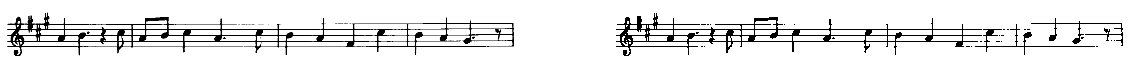

In [12]:
img = cv2.imread('partitura.png', 0)
umbral = 120
output = change_img(img, umbral)

plt.figure(figsize=(20,40))
plt.subplot(1,2,1)
show_img(img)
plt.subplot(1,2,2)
show_img(output)
plt.show()

In [0]:
def threshold(img):
  return cv2.threshold(img,0 , 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)

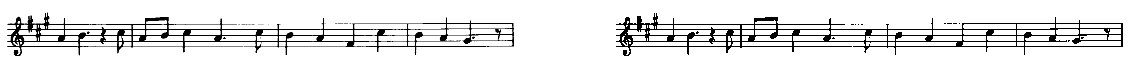

In [15]:
ret, thres = threshold(img)

plt.figure(figsize=(20,40))
plt.subplot(1,2,1)
show_img(img)
plt.subplot(1,2,2)
show_img(thres)
plt.show()

In [0]:
def erosion(img):
  new_img = np.ones((img.shape[0] + 2, img.shape[1] + 2), dtype = np.uint8)
  new_img[1:img.shape[0] + 1, 1 : img.shape[1] + 1] = img

  output = np.zeros_like(new_img)

  for i in range(1, new_img.shape[0] - 1):
    for j in range(1, new_img.shape[1] - 1): #delete horizontal lines
      if(new_img[i , j] == 255 and new_img[i + 1, j] == 255 and new_img[i - 1, j] == 255):
        output[i, j] = 255
  
  return output[1:img.shape[0] + 1, 1:img.shape[1] + 1]

In [0]:
output = erosion(erosion(255 - thres))
output = 255 - output

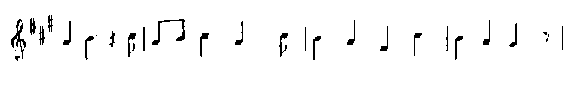

In [58]:
plt.figure(figsize=(10,20))
show_img(output)